# Homework 7

In [1]:
#install.packages("neuralnet")
library(neuralnet)

In [2]:
bank <- read.csv("data/bankruptcy_prediction/data.csv")
head(bank)
str(bank)

,Bankrupt.,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,⋯,Net.Income.to.Total.Assets,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,0.3705943,0.4243894,0.4057498,0.6014572,0.6014572,0.9989692,0.7968871,0.8088094,0.3026464,⋯,0.7168453,0.009219440,0.6228790,0.6014533,0.8278902,0.2902019,0.02660063,0.5640501,1,0.01646874
2,1,0.4642909,0.5382141,0.5167300,0.6102351,0.6102351,0.9989460,0.7973802,0.8093007,0.3035564,⋯,0.7952971,0.008323302,0.6236517,0.6102365,0.8399693,0.2838460,0.26457682,0.5701749,1,0.02079431
3,1,0.4260713,0.4990188,0.4722951,0.6014500,0.6013635,0.9988574,0.7964034,0.8083875,0.3020352,⋯,0.7746697,0.040002853,0.6238410,0.6014493,0.8367743,0.2901885,0.02655472,0.5637061,1,0.01647411
4,1,0.3998440,0.4512647,0.4577333,0.5835411,0.5835411,0.9986997,0.7969670,0.8089656,0.3033495,⋯,0.7395545,0.003252475,0.6229287,0.5835376,0.8346971,0.2817212,0.02669663,0.5646634,1,0.02398233
5,1,0.4650222,0.5384322,0.5222978,0.5987835,0.5987835,0.9989731,0.7973661,0.8093037,0.3034750,⋯,0.7950159,0.003877563,0.6235207,0.5987815,0.8399727,0.2785138,0.02475185,0.5756166,1,0.03549020
6,1,0.3886803,0.4151766,0.4191338,0.5901714,0.5902507,0.9987581,0.7969032,0.8087706,0.3031158,⋯,0.7104205,0.005277875,0.6226046,0.5901723,0.8299390,0.2850871,0.02667537,0.5645383,1,0.01953448


'data.frame':	6819 obs. of  96 variables:
 $ Bankrupt.                                              : int  1 1 1 1 1 1 0 0 0 0 ...
 $ ROA.C..before.interest.and.depreciation.before.interest: num  0.371 0.464 0.426 0.4 0.465 ...
 $ ROA.A..before.interest.and...after.tax                 : num  0.424 0.538 0.499 0.451 0.538 ...
 $ ROA.B..before.interest.and.depreciation.after.tax      : num  0.406 0.517 0.472 0.458 0.522 ...
 $ Operating.Gross.Margin                                 : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Realized.Sales.Gross.Margin                            : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Operating.Profit.Rate                                  : num  0.999 0.999 0.999 0.999 0.999 ...
 $ Pre.tax.net.Interest.Rate                              : num  0.797 0.797 0.796 0.797 0.797 ...
 $ After.tax.net.Interest.Rate                            : num  0.809 0.809 0.808 0.809 0.809 ...
 $ Non.industry.income.and.expenditure.revenue            : num  0.303 0.304 0.30

In [7]:
summary(bank)

   Bankrupt.       ROA.C..before.interest.and.depreciation.before.interest
 Min.   :0.00000   Min.   :0.0000                                         
 1st Qu.:0.00000   1st Qu.:0.4765                                         
 Median :0.00000   Median :0.5027                                         
 Mean   :0.03226   Mean   :0.5052                                         
 3rd Qu.:0.00000   3rd Qu.:0.5356                                         
 Max.   :1.00000   Max.   :1.0000                                         
 ROA.A..before.interest.and...after.tax
 Min.   :0.0000                        
 1st Qu.:0.5355                        
 Median :0.5598                        
 Mean   :0.5586                        
 3rd Qu.:0.5892                        
 Max.   :1.0000                        
 ROA.B..before.interest.and.depreciation.after.tax Operating.Gross.Margin
 Min.   :0.0000                                    Min.   :0.0000        
 1st Qu.:0.5273                                

In [6]:
table(is.na(bank))


 FALSE 
654624 

### Q1: Randomly divide data into train/test as 80/20 ( set.seed =1)


In [8]:
set.seed(1)
rtrain<-sample(nrow(bank),nrow(bank)*0.8)
train<-bank[rtrain,]
test<-bank[-rtrain,]

nrow(train)
nrow(test)
nrow(train)+nrow(test) == nrow(bank)


[1] 5455

[1] 1364

[1] TRUE

In [9]:
table(train$Bankrupt.)


   0    1 
5279  176 

### Q2: Build a NN model with 1 hidden layer of 30 neurons, sigmoid activation function.


In [15]:
#activation function from logistic is the sigmoid act func.

nnmod <- neuralnet(Bankrupt.~., hidden=30, data = train,threshold=0.1,stepmax =100000,act.fct="logistic")
#plot(nnmod, rep="best")

Warning message:
"Algorithm did not converge in 1 of 1 repetition(s) within the stepmax."


In [16]:
summary(nnmod)

              Length Class      Mode    
call               7 -none-     call    
response        5455 -none-     numeric 
covariate     518225 -none-     numeric 
model.list         2 -none-     list    
err.fct            1 -none-     function
act.fct            1 -none-     function
linear.output      1 -none-     logical 
data              96 data.frame list    
exclude            0 -none-     NULL    

In [17]:
predict(nnmod,bank[rtrain,])

ERROR: Error in cbind(1, pred) %*% weights[[num_hidden_layers + 1]]: requires numeric/complex matrix/vector arguments



### Q3: Build a deep NN model with multiple hidden layers (of your choice) and sigmoid activation function.

In [19]:
nnmod2 <- neuralnet(Bankrupt.~., hidden=c(5,10,5), data = train,act.fct="logistic")

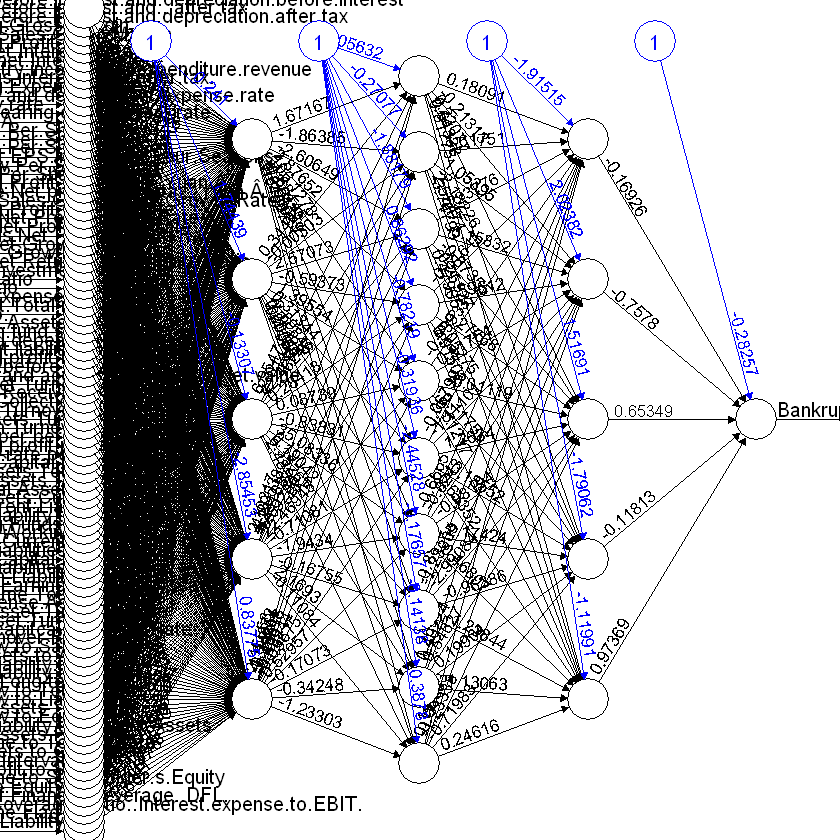

In [20]:
plot(nnmod2,rep="best")

In [21]:
predict(nnmod,bank[rtrain,])

ERROR: Error in cbind(1, pred) %*% weights[[num_hidden_layers + 1]]: requires numeric/complex matrix/vector arguments


### Q4: Build 5 other classification models and compare with the 2 previous NN models.

In [23]:
log_mod <-glm(Bankrupt.~.,data=train,family="binomial")
summary(log_mod)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Bankrupt. ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1126  -0.1481  -0.0679  -0.0279   3.6718  

Coefficients: (4 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              1.230e+07  5.615e+08
ROA.C..before.interest.and.depreciation.before.interest -1.926e+01  1.353e+01
ROA.A..before.interest.and...after.tax                  -1.611e+00  9.384e+00
ROA.B..before.interest.and.depreciation.after.tax        1.882e+01  1.781e+01
Operating.Gross.Margin                                   1.075e+04  4.784e+04
Realized.Sales.Gross.Margin                              2.066e+01  1.768e+02
Operating.Profit.Rate                                   -8.776e+05  1.671e+06
Pre.tax.net.Interest.Rate                                7.342e+05  1.396e+06
After.tax.net.Interest.Rate                             -

In [35]:
lpred <- predict(log_mod, test,type="response")
lpred2<- ifelse(lpred>=0.5,1,0)
mean((test$Bankrupt - lpred2)^2)
table(test$Bankrupt,lpred2)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.03812317

   lpred2
       0    1
  0 1303   17
  1   35    9

In [36]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [44]:
rf_mod <- randomForest(as.factor(Bankrupt.)~., data=train, proximity=TRUE)

In [47]:
rfpred <- as.numeric(as.character(predict(rf_mod, test)))
mean((test$Bankrupt. - rfpred)^2)
table(test$Bankrupt,rfpred)

[1] 0.03079179

   rfpred
       0    1
  0 1313    7
  1   35    9